# Motivation

Being able to predict breast cancer could save the lives of thousands of women every year. According to BreastCancer.org, breast cancer accounts for 30% of all cancer diagnosis in women each year in the United States alone. In 2022, it is estimated that 287,850 new cases of invasive breast cancer will be diagnosed in women in the United States. While breast cancer usually cannot be prevented, early detection of it is key to survival. If breast cancer can be detected before it spreads, there is a 99% 5-year survival rate.

By examining specific aspects of abnormal breast tissue cells, we can create a model to predict whether there is a tumor that is benign (non-cancerous) or malignant (cancerous) with relatively high accuracy. In this tutorial, my objective is to see how accurately we can make this prediction using a Random Forest Classifier.

# Table of Contents
### i. Data Collection
        -Examining and Tidying the Data
        -Data Transformation
### ii. Exploratory Data Analysis
        -Graphing Features vs. Diagnosis
        -Correlations Between Features
### iii. Modeling the Data
        -Test-Train Split
        -Univariate Feature Selection
        -Random Forest with Best Selected Features
        -HyperTuning the Parameters
        -Random Forest with Optimal Parameters
### iv. Conclusion

# Data Collection

The dataset was found on kaggle.com. It contains 32 columns and 569 rows. Each column is a feature that was computed from a digitized image of a fine needle aspirate (FNA) of a breast mass. Each feature describes the cell nuclei's characteristics captured in the image. Let's go over the features:

    1. ID number
    2. Diagnosis ('M' = malignant, 'B' = benign)
    
The next 30 columns are divided into 3 categories (10 features for each category)
    3. - 32.
    
        - radius (mean of distances from center to points on the perimeter)
        - texture (standard deviation of gray-scale values)
        - perimeter
        - area
        - smoothness (local variation in radius lengths)
        - compactness (perimeter^2 / area - 1.0)
        - concavity (severity of concave portions of the contour)
        - concave points (number of concave portions of the contour)
        - symmetry
        - fractal dimension ("coastline approximation" - 1)
        
The 3 categories for the last 30 features are the mean, standard error, and the worst, meaning, the average of the 3 largest values.


In [1]:
#import libraries and read the data into a dataframe

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

data_frame = pd.read_csv("data.csv")
data_frame.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


### Examining and Tidying the Data

lets take a look at the data types we will be working with.

In [2]:
data_frame.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

We can see from the data types being printed out that all values are non-null (except in the "Unnamed" column). This means we have no missing data in columns that we need. There is a column called "Unnammed: 32" and a column called "id" that we can get rid of because they don't store any important information for us.

In [3]:
#dropping unnecessary columns

data_frame.drop(labels = ["Unnamed: 32", "id"], axis = 1, inplace = True)

data_frame.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


### Data Transformation

Lets split the dataframe into the 3 seperate categories: mean, standard error and worst. We can have a dataframe for each category to simplify things. Also, I notice that there is a large difference between some of the values. For example, in row 1, the radius mean is 17.99 but the smoothness mean is 0.11840. The data should be standardized as well to help us visualize the data better.

In [4]:
#standardizing the data 

#we first need to drop the diagnosis column because it's a classification column and not numeric
data_standardized = data_frame.drop(labels = "diagnosis", axis = 1, inplace = False)

data_standardized = (data_standardized - data_standardized.mean()) / data_standardized.std() #standardizing the data

#splitting into 3 seperate frames
diagnosis = data_frame["diagnosis"]

mean_frame = data_standardized.iloc[:,0:10]
mean_frame = mean_frame.join(diagnosis)

se_frame = data_standardized.iloc[:,11:21]
se_frame = se_frame.join(diagnosis)

worst_frame = data_standardized.iloc[:,21:,]
worst_frame = worst_frame.join(diagnosis)


# Exploratory Data Analysis

Now that we have had an initial look at the data and transformed it, we want to visualize the data to get more insights into it. We can make a few graphs and get a better look at the features, how they relate to eachother and how they relate to the diagnosis.

First, I will graph the count of benign diagnosis vs malignant diagnosis to get a better intuition of the data.

<AxesSubplot:xlabel='diagnosis', ylabel='count'>

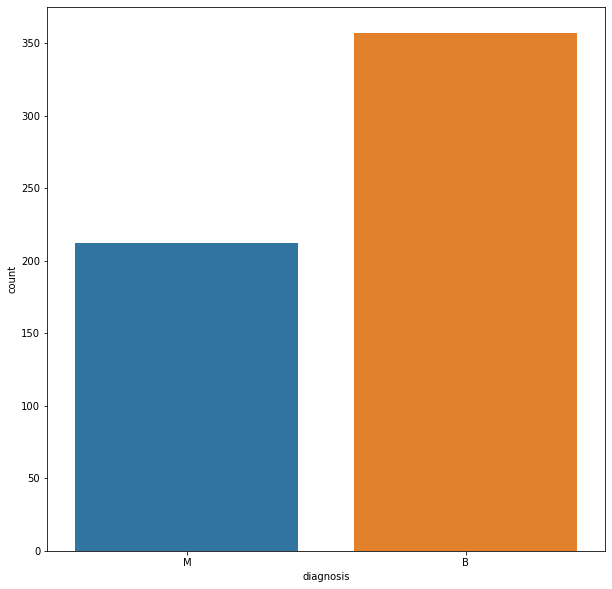

In [5]:
#count of malignant vs. benign
plt.figure(figsize=(10,10))
sns.countplot(data=data_frame, x='diagnosis')

### Graphing Features vs. Diagnosis

I think it would be useful to see how the features relate to the diagnosis. For example, we can see the correlation between a malignant diagnosis and texture mean or area mean. This will help us get a sense of the relationship between the features and a malignant or benign diagnosis. Since we want to actually see the relationship between all features and the diagnosis, I think a box plot would be most useful here. 

I am going to transform the data frame using panda's "melt" function so that we can plot all features and see how they are related to the diagnosis. Just to make things simpler, I will plot each of the 3 categories seperately and we will use the standardized data so we have a correct scale to view everything.

Text(0.5, 1.0, 'Mean Category')

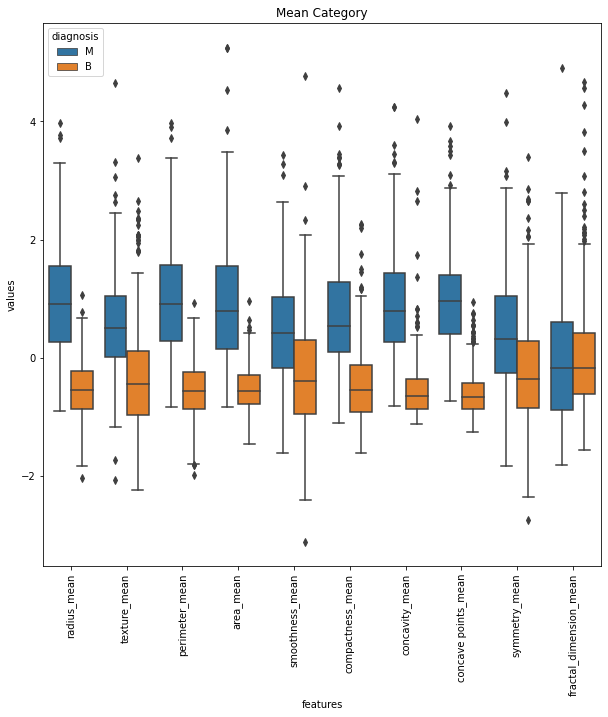

In [6]:
#Transforming the dataframe
frame = mean_frame.melt(id_vars = "diagnosis", var_name = "features", value_name = "values")

#Plotting the mean category 
plt.figure(figsize = (10,10))
sns.boxplot(data = frame, x = "features", y = "values", hue = "diagnosis")
plt.xticks(rotation = 90)
plt.title("Mean Category")

Text(0.5, 1.0, 'Standard Error Category')

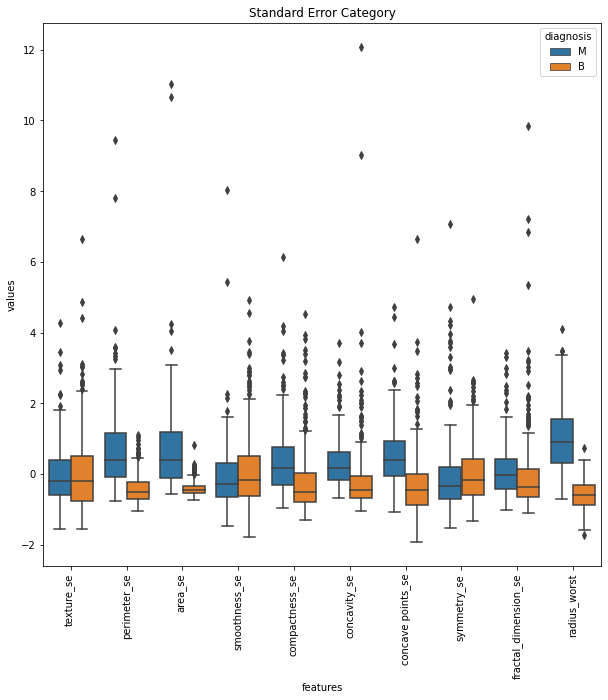

In [7]:
#Transforming the dataframe
frame = se_frame.melt(id_vars = "diagnosis", var_name = "features", value_name = "values")

#Plotting the standard error category of features
plt.figure(figsize = (10,10))
sns.boxplot(data = frame, x = "features", y = "values", hue = "diagnosis")
plt.xticks(rotation = 90)
plt.title("Standard Error Category")

Text(0.5, 1.0, 'Worst Category')

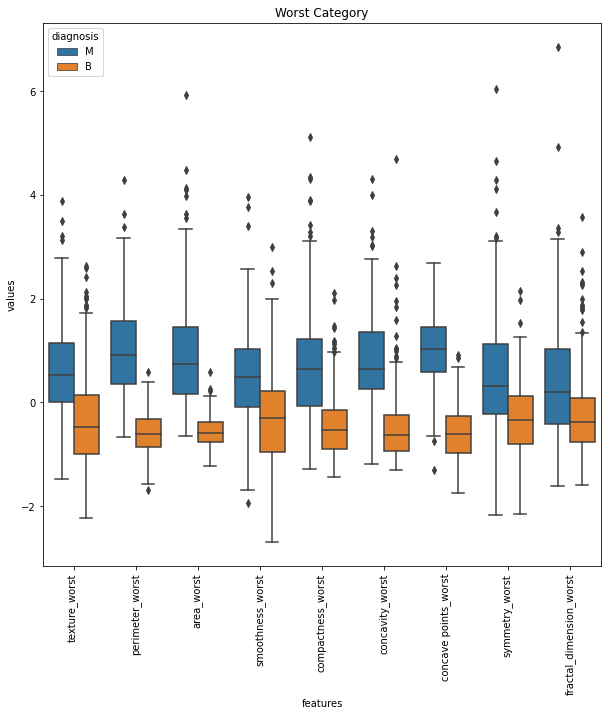

In [8]:
#Transforming the dataframe
frame = worst_frame.melt(id_vars = "diagnosis", var_name = "features", value_name = "values")

#Plotting the worst category of features
plt.figure(figsize = (10,10))
sns.boxplot(data = frame, x = "features", y = "values", hue = "diagnosis")
plt.xticks(rotation = 90)
plt.title("Worst Category")

Let's analyze these box plots. In the first plot, the Mean Category plot, I notice a correlation between each feature's value and the diagnosis. All the values for a malignant diagnosis are much higher than values for a benign diagnosis. This can be seen clearly by comparing the medians of the malignant and benign boxes. The fractal dimension mean feature barely has a difference between the median of malignant and benign which means it won't be very useful for classification. From the Mean Category plot and the Worst Category plot I can also see that some of the features are very close. Radius mean and perimeter mean look almost the same. So does area mean and concavity mean as well as concavity worst and concave points worst. But how do we know if these features are actually corellated or not? We can create a correllation graph to be sure.


### Correlation Between Features

A correlation graph will give us more insight into which features are correlated with eachother. This can be useful to know because it gives us more knowledge about the data and can help us decide which features are just "noise" and which ones are truly important. Each box in the matrix has a score between -1 and 1. The further away the score is from 0, the stronger the relationship is between the two features. We want to keep notice of any pair of features that have a score very close to 1 because that means they have a strong positive correlation.

<AxesSubplot:>

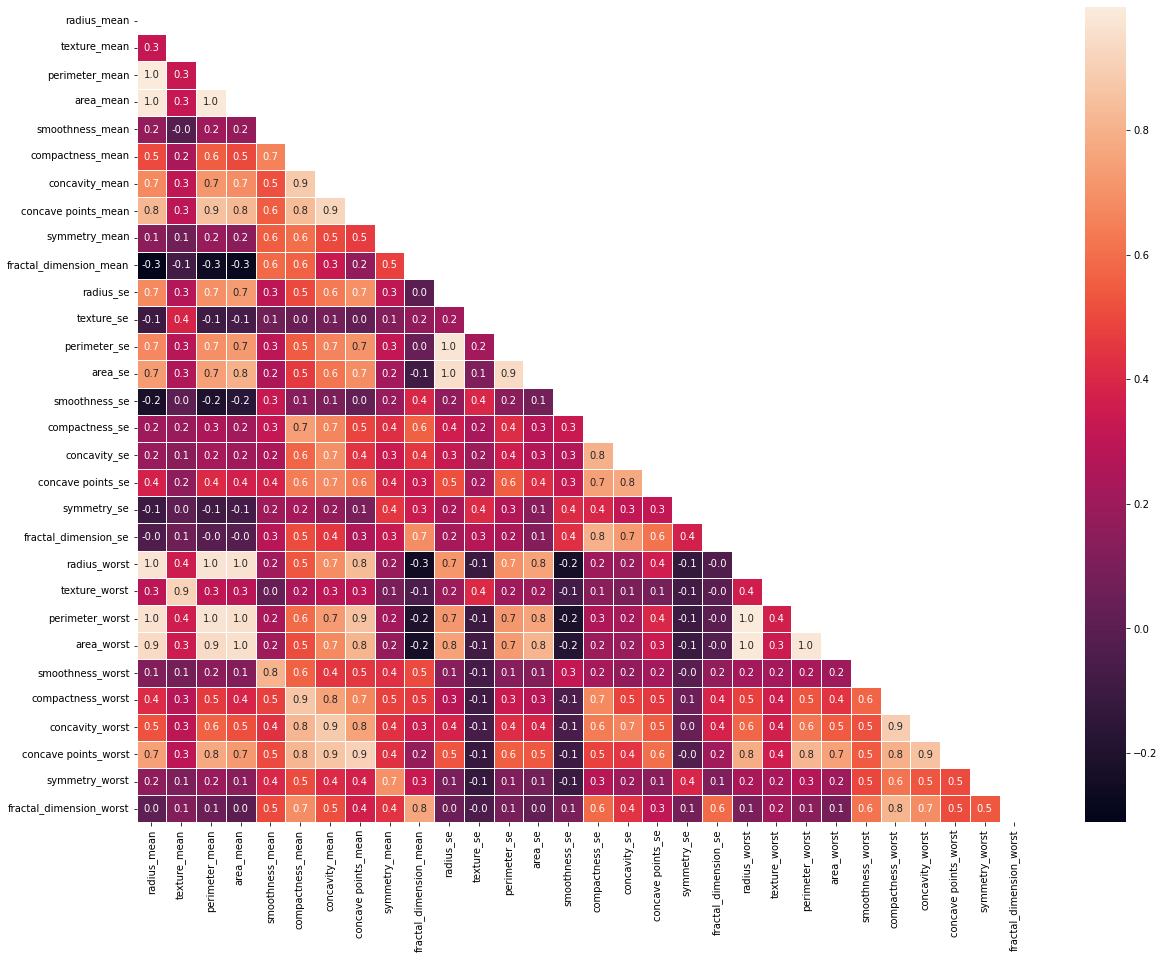

In [9]:
#Make copy of dataframe without diagnosis column
df = data_frame.drop(labels = 'diagnosis', axis = 1, inplace = False)

#Get correlation data using .corr()
df = df.corr()

#Creating a "mask" so we only see the lower half of the matrix because it is symmetrical
mask = np.triu(np.ones_like(df, dtype = bool))

plt.figure(figsize=(20,15))
sns.heatmap(data = df, mask = mask, annot = True, fmt = ".1f", linewidth = .5)

Now we can see exactly how every feature relates to one another. Just as we suspected from examining the box plots above, there is a strong positive linear relationship between concavity worst and concave points worst, area mean and concavity mean, and radius mean and perimeter mean. We can also discover some new correlations that were not detected from examining the box plots. For example, radius mean and area mean and radius worst and area worst are highly correlated.

# Modeling the Data

### Test-Train Split

Here, we obtain the data again. It is the exact same data set used above, but it is from scikit-learn.org. I am getting the same data a second time simply because it's easier than to refigure the dataframe we used earlier. I can set the parameter "return_X_y" equal to true and this returns the data I will test and train the classifier with. I'm using a 70/30 split; 70% of the data will be used to train the classifier and 30% will be used to test it.

In [10]:
from sklearn import datasets
from sklearn.model_selection import train_test_split

X, y = datasets.load_breast_cancer(return_X_y = True)

xTrain, xTest, yTrain, yTest = train_test_split(X, y, test_size = 0.3, random_state = 42)

### Univariate Feature Selection 

Univariate feature selection works by selecting the best features based on univariate statistical tests. Feature Selection is important because it can improve our model's accuracy. It is another pre-processing step to making our model, much like hyptertuning the parameters was another pre-processing step. The goal with univariate feature selection is to eliminate all the unimportant features that don't give us much interesting information. For this part of the tutorial, I decided to go with the Select k Best algorithm. This algorithm selects features according to the best k scores. We could have also selected features from the correlation map, but this algorithm will do the hard work for us. Also, there is no real reason I went with k = 5. I experimented with a few different values and 5 seemed to give the model the best accuracy.

In [11]:
#Using SelectKBest that removes all but k of the highest scoring features
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

#Find best 5 features
select_feature = SelectKBest(chi2, k = 5).fit(xTrain, yTrain)

#Print out 5 best features
filter = select_feature.get_support()
features = data_frame.drop(labels='diagnosis', axis=1, inplace=False).keys()
print(features[filter])

Index(['perimeter_mean', 'area_mean', 'area_se', 'perimeter_worst',
       'area_worst'],
      dtype='object')


The algorithm selected the following 5 features as being the most important:
1. perimeter_mean
2. area_mean
3. area_se
4. perimeter_worst
5. area_worst

### Random Forest with Best Selected Features

Now that we have selected the most informative features, we can train our model and exclude all noise.

In [12]:
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics

rfc = RandomForestClassifier()

#Reduce xTrain2 to the selected features
xTrain2 = select_feature.transform(xTrain)
xTest2 = select_feature.transform(xTest)

rfc.fit(xTrain2, yTrain)
predict = rfc.predict(xTest2)

#Print results
print("accuracy:", metrics.accuracy_score(yTest, predict))
print("precision:", metrics.precision_score(yTest, predict, average='weighted'))
print("recall:", metrics.recall_score(yTest, predict, average='weighted'))

accuracy: 0.9590643274853801
precision: 0.9589959657949254
recall: 0.9590643274853801


<AxesSubplot:>

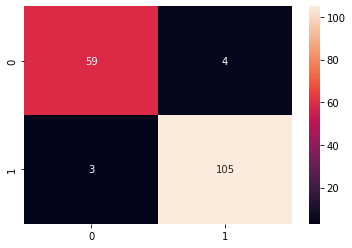

In [13]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(yTest, predict)
sns.heatmap(cm, annot = True, fmt = 'd')

Our model had accuracy result of 96%. We can also see from the confusion matrix that we had 3 false negatives and 4 false positives. This means 3 patients were diagnosed as benign when their cancer was actually malignant, and 4 patients were diagnosed as having malignant breast cancer when they were actually benign. We want to have as little false negatives as possible because it could be detrimental to patients who are diagnosed as benign when they need cancer treatment. The other metrics used aside from accuracy were precision and recall.

precision: This measures what percentage of all patients diagnosed with malignant breast cancer were identified correctly by our model. The model has a precision score of 96%.

recall: This measures the percentage that our model correctly identified as a true positive (the lower right quadrant of the matrix). The model has a recall score of 96%.

### Hypertuning the Parameters

Hypertuning parameters is another pre-processing step for our model. Hypertuning the parameters means to find the most ideal parameters for the model that will give us the best results. This improves the model's accuracy and can be done via a random search algorithm or grid search algorithm. I will use a grid search to find the most ideal parameters. We can then compare this to the model above that had the ideal subset of features.

In [14]:
#Tune hyperparameters
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics

#Grid Search to find the best optimal parameters
rfc_params = [{'n_estimators': [100], 'max_depth': [0.1, 1, 10, 100], 'max_features': ['auto', 'sqrt', 'log2']}]
rfc = RandomForestClassifier()
clf = GridSearchCV(rfc, rfc_params, cv = 10, verbose = 0, scoring = 'accuracy')
clf.fit(xTrain, yTrain)

GridSearchCV(cv=10, estimator=RandomForestClassifier(),
             param_grid=[{'max_depth': [0.1, 1, 10, 100],
                          'max_features': ['auto', 'sqrt', 'log2'],
                          'n_estimators': [100]}],
             scoring='accuracy')

In [15]:
print(clf.best_params_)
print(clf.best_score_)

{'max_depth': 100, 'max_features': 'sqrt', 'n_estimators': 100}
0.9647435897435898


The grid search returned our ideal parameters as being a max depth of 100, max feature of 'sqrt' and 100 n estimators. Next, we will use these parameters in our random forest classifier and compare the scores to our random forest classifier above.

### Random Forest with Optimal Parameters

In [16]:
#Random forest classification with optimized hyperparameters
rfc = RandomForestClassifier(max_depth = 100, max_features = 'sqrt')
rfc.fit(xTrain, yTrain)
predict = rfc.predict(xTest)

In [17]:
#Evaluate random forest model
print("accuracy:", metrics.accuracy_score(yTest, predict))
print("precision:", metrics.precision_score(yTest, predict, average='weighted'))
print("recall:", metrics.recall_score(yTest, predict, average='weighted'))

accuracy: 0.9707602339181286
precision: 0.9707325431068053
recall: 0.9707602339181286


<AxesSubplot:>

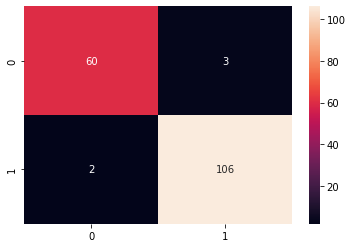

In [18]:
cm = confusion_matrix(yTest, predict)
sns.heatmap(cm, annot = True, fmt = 'd')

We can see that the scores of the random forest classifier with hyper tuned parameters has better scores than the random forest classifier with ideal subset of features. This model had an accuracy score of 97%, precision and recall were also 97%. Also, we have less amount of false positives and false negatives, as seen in the matrix. This means that there is a slight difference in pre-processing methods, and in this case, hypertuning the parameters gave us better results.

# Conclusion

To summarize, we obtained the data, cleaned it up, analyzed it and modeled it. At the end, we came to the conclusion that using our classifier with hyper tuned parameters gave us the best results as opposed to the classifier with feature selection. By "best results", what I mean is that we were able to create a model that predicted a diagnosis accurately 97% of the time when compared with the true data set. 97% is pretty good and I am pleased with the results. It would be interesting to compare the accuracy of other models as well and see if it is possible to do better than 97%.